In [2]:
import datetime
import pandas as pd
import numpy as np

In [3]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
%matplotlib inline

TODO
- include profile information such as household type in the custer analysis
- monitor how clusters evolve dynamically over the months
- include control group data. We do not actually know what are users not on the platform doing. Maybe they are saving much more…

# Import data

In [168]:
#import seaborn; 
#seaborn.set()

In [4]:
import pickle

In [5]:
base=pickle.load(open('./base_SES.pck','rb'))
cons=pickle.load(open('./cons_SES.pck','rb'))


## Import the baseline into a multicolumn DataFrame

In [6]:
# create a table by concatenating the baselines of all users
#basedf = [pd.concat([df],axis=1) for df in base['cons']]  <-- this creates a LIST non a Dataframe
baseline=pd.DataFrame()
for elem in base['cons']:
    baseline =pd.concat([baseline,elem], axis=1)

In [21]:
# extract the usernames to create the coulmn names
id2pos = {'id':base['user'],'pos':range(0,len(base))}

# assign the column names
baseline.columns = [x[1] for x in id2pos['id']]

# remove NaN
baseline.dropna()


,79,80,81,82,83,84,85,86,87,88,...,144,145,146,147,148,149,150,151,152,153
month,,,,,,,,,,,,,,,,,,,,,
2017-05-31,456.481,760.562,358.370,318.224,133.513,260.122,388.716,261.457,828.244,185.572,...,562.131,210.580,322.797,625.259,626.283,310.780,271.541,425.646,304.684,231.251
2017-06-30,227.124,544.328,422.738,358.857,169.949,34.194,348.973,252.570,824.793,225.440,...,400.207,220.998,339.299,561.062,817.808,81.661,207.449,370.442,286.399,201.199
2017-07-31,309.771,568.914,349.797,351.834,140.354,39.294,336.459,218.424,737.765,207.070,...,465.830,127.049,444.548,561.025,821.774,86.452,264.429,333.084,251.829,193.320
2017-08-31,346.875,535.292,401.216,362.265,176.047,36.225,373.168,230.551,741.102,207.970,...,458.046,96.826,446.410,609.375,876.898,85.032,292.814,353.005,320.578,197.725
2017-09-30,472.308,559.926,436.974,305.943,115.063,34.791,535.535,263.015,876.658,215.730,...,467.570,146.604,374.930,612.541,859.124,100.767,384.085,364.767,578.664,187.173
2017-10-31,369.948,687.506,437.011,372.790,143.061,44.000,534.715,594.475,1034.839,265.153,...,526.376,170.049,437.815,517.465,1291.350,106.313,389.590,455.315,1599.539,238.613
2017-11-30,509.492,1258.417,451.139,693.225,149.065,43.468,586.299,1154.950,1629.407,328.036,...,940.037,197.961,479.417,484.164,2964.415,146.144,540.021,748.935,788.851,246.461
2017-12-31,931.182,2206.278,532.253,1043.034,159.672,46.175,982.887,1448.760,2567.758,540.445,...,1887.031,148.208,561.549,1444.193,3412.849,238.220,554.852,1197.287,1668.610,296.702
2018-01-31,1129.855,1926.540,471.847,882.258,176.719,49.141,899.068,1220.582,2208.962,494.020,...,1353.353,194.002,542.426,1046.596,3292.295,204.086,552.744,890.277,1262.944,266.648


In [22]:
#remove april
base_no_april = baseline.drop(baseline.index[:1])
baseline_may_dec=base_no_april.drop(baseline.index[9:])

In [23]:
baseline_may_dec

,79,80,81,82,83,84,85,86,87,88,...,144,145,146,147,148,149,150,151,152,153
month,,,,,,,,,,,,,,,,,,,,,
2017-06-30,227.124,544.328,422.738,358.857,169.949,34.194,348.973,252.570,824.793,225.440,...,400.207,220.998,339.299,561.062,817.808,81.661,207.449,370.442,286.399,201.199
2017-07-31,309.771,568.914,349.797,351.834,140.354,39.294,336.459,218.424,737.765,207.070,...,465.830,127.049,444.548,561.025,821.774,86.452,264.429,333.084,251.829,193.320
2017-08-31,346.875,535.292,401.216,362.265,176.047,36.225,373.168,230.551,741.102,207.970,...,458.046,96.826,446.410,609.375,876.898,85.032,292.814,353.005,320.578,197.725
2017-09-30,472.308,559.926,436.974,305.943,115.063,34.791,535.535,263.015,876.658,215.730,...,467.570,146.604,374.930,612.541,859.124,100.767,384.085,364.767,578.664,187.173
2017-10-31,369.948,687.506,437.011,372.790,143.061,44.000,534.715,594.475,1034.839,265.153,...,526.376,170.049,437.815,517.465,1291.350,106.313,389.590,455.315,1599.539,238.613
2017-11-30,509.492,1258.417,451.139,693.225,149.065,43.468,586.299,1154.950,1629.407,328.036,...,940.037,197.961,479.417,484.164,2964.415,146.144,540.021,748.935,788.851,246.461
2017-12-31,931.182,2206.278,532.253,1043.034,159.672,46.175,982.887,1448.760,2567.758,540.445,...,1887.031,148.208,561.549,1444.193,3412.849,238.220,554.852,1197.287,1668.610,296.702
2018-01-31,1129.855,1926.540,471.847,882.258,176.719,49.141,899.068,1220.582,2208.962,494.020,...,1353.353,194.002,542.426,1046.596,3292.295,204.086,552.744,890.277,1262.944,266.648


## Import the consumption data into a multicolumn dataframe

In [24]:
#consumption = [pd.concat([df],axis=1) for df in cons['cons']]
consumption=pd.DataFrame()
for elem in cons['cons']:
    consumption =pd.concat([consumption,elem], axis=1)

In [25]:
consumption.columns = [x[1] for x in id2pos['id']]


In [26]:
monthly=consumption.resample('M').sum()

In [27]:
monthly.isnull().sum().sum()

0

In [28]:
#remove april
monthly_no_april = monthly.drop(monthly.index[:1])

In [29]:
#remove january

#monthly_may_nov = monthly_no_april.drop(datetime.date(2018,12,31))
#monthly_may_nov
monthly_may_dec = monthly_no_april.drop(datetime.date(2019,1,31))
monthly_may_dec

,79,80,81,82,83,84,85,86,87,88,...,144,145,146,147,148,149,150,151,152,153
datetime,,,,,,,,,,,,,,,,,,,,,
2018-05-31,293.642,566.768,398.927,325.004,149.160,69.219,613.792,265.195,0,2526.314,...,463.508,172.903,285.163,568.670,877.899,106.687,355.623,386.219,421.581,200.540
2018-06-30,258.342,434.829,343.086,279.128,140.482,64.209,492.405,246.206,7.600,367.073,...,415.339,34.656,0,511.448,69.207,79.206,265.830,336.304,553.308,190.577
2018-07-31,272.401,424.423,402.252,277.056,174.856,74.863,379.435,148.899,141.791,206.094,...,418.200,106.016,352.946,514.117,461.168,84.369,264.739,325.132,578.710,201.028
2018-08-31,267.952,399.140,472.635,280.147,212.907,77.701,431.616,220.655,154.502,410.361,...,380.321,23.489,230.224,559.682,1145.402,83.026,294.305,187.787,530.018,209.993
2018-09-30,252.563,373.868,546.690,301.085,113.322,65.886,473.514,259.191,78.605,187.404,...,574.145,0,0,496.716,953.550,82.871,316.015,284.061,953.974,157.299
2018-10-31,163.150,555.217,663.623,463.232,143.945,66.369,664.258,412.310,10.247,226.473,...,575.156,28.592,99.779,639.716,1061.161,143.931,411.848,424.042,525.032,209.849
2018-11-30,721.553,1013.908,671.317,659.790,160.176,69.524,809.871,806.202,107.653,328.874,...,978.939,197.877,431.457,610.442,2333.462,168.132,457.017,624.671,828.097,269.792
2018-12-31,838.160,1732.867,579.453,1023.195,142.555,85.840,776.896,1305.861,61.036,399.637,...,1595.791,152.054,574.871,833.489,4480.389,201.591,524.448,853.832,1394.723,329.630


## Import profile data

In [30]:
profiles=pickle.load(open('./profiles_SES.pck','rb'))

## Import  activity data

In [31]:
act=pickle.load(open('./activity_SES.pck','rb'))

In [32]:
actions=pd.DataFrame()
for elem in act['activity']:
    actions =pd.concat([actions,elem], axis=1)

In [33]:
# extract the usernames to create the coulmn names
id2pos = {'id':act['user'],'pos':range(0,len(act))}

id2pos


{'id': 0               (252, fbf, 79)
 1               (253, pcc, 80)
 2         (254, mtt.mrcll, 81)
 3              (255, nvmn, 82)
 4           (256, Dnl.pcc, 83)
 5            (257, fd.952, 84)
 6         (258, cnz.ln.85, 85)
 7           (259, tnn.pdl, 86)
 8           (260, t.pngll, 87)
 9               (261, mmn, 88)
 10        (262, sndrsssll, 89)
 11        (264, dnl.crrtt, 91)
 12        (265, flv.frnch, 92)
 13       (266, jnny.cndlf, 93)
 14         (267, jkvvnkvc, 94)
 15            (268, slvln, 95)
 16            (269, nppzz, 96)
 17         (270, mm.frrll, 97)
 18          (271, jr61150, 98)
 19          (272, stfn.mn, 99)
 20     (273, crstn.cmzzl, 100)
 21           (274, Snj84, 101)
 22          (275, gmfrss, 102)
 23          (276, Mrk.cr, 103)
 24             (277, nf4, 104)
 25             (278, Jl9, 105)
 26         (279, rbrt.mr, 106)
 27         (280, .BRCSLS, 107)
 28          (282, mp8569, 109)
 29          (285, d.grbn, 112)
 30            (286, mvjn, 113)
 3

In [34]:
# assign the column names
actions.columns = [x[2] for x in id2pos['id']]


#actions.dropna()



In [35]:
monthly_actions=actions.resample('M').sum()
#monthly_actions.columns

In [36]:
log=pickle.load(open('./logins_SES.pck','rb'))

In [37]:
logins=pd.DataFrame()
for elem in log['logins']:
    logins =pd.concat([logins,elem], axis=1)

In [38]:
# extract the usernames to create the coulmn names
id2pos = {'id':log['user'],'pos':range(0,len(log))}

# assign the column names
logins.columns = [x[2] for x in id2pos['id']]



In [39]:
monthly_logins=logins.resample('M').sum()
#monthly_logins.columns

# Data analysis

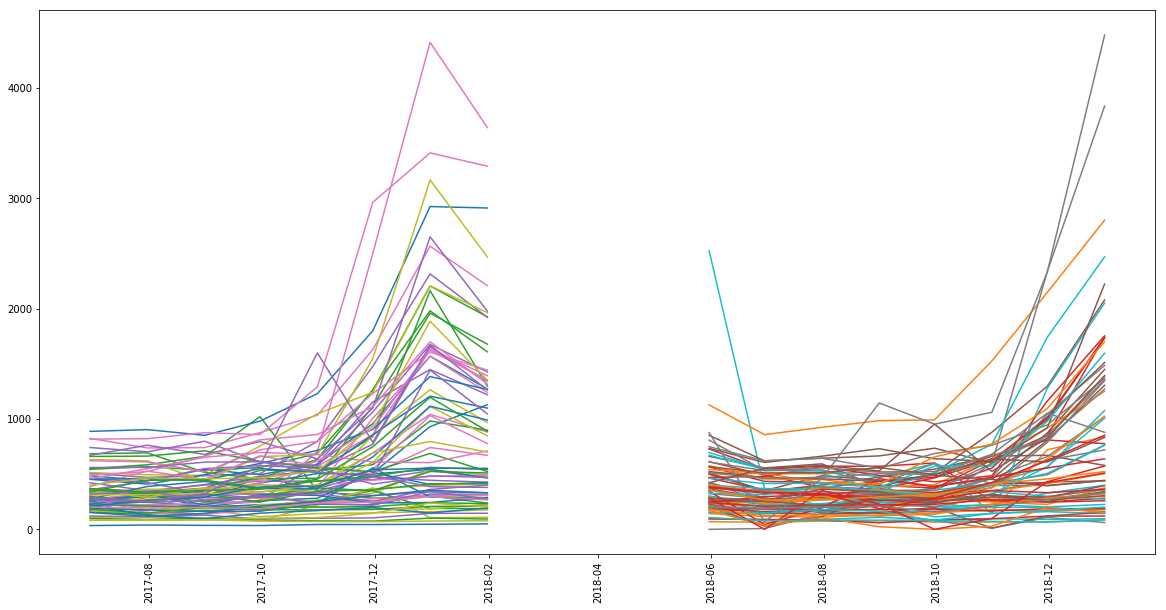

In [40]:
fig=plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
for i in monthly.columns:
    plt.plot(baseline_may_dec[i])
    plt.plot(monthly_may_dec[i])

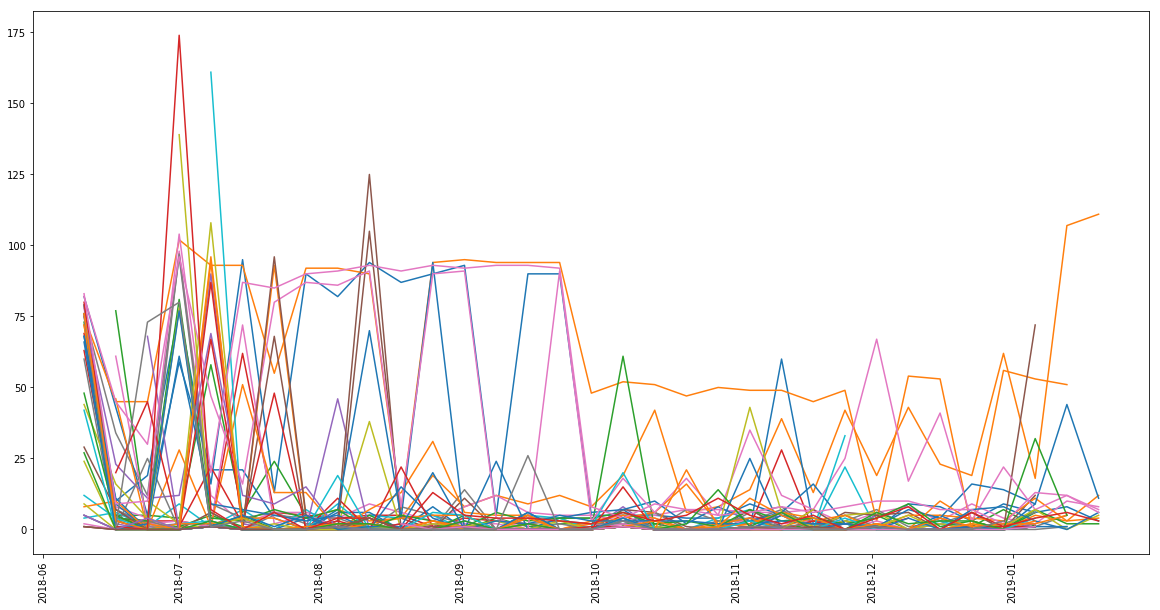

In [41]:
fig=plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
for i in actions.columns:
    plt.plot(actions[i])


### Group analysis

In [42]:
group_mean=monthly_may_dec.mean(1)
print(group_mean)

datetime
2018-05-31    413.508905
2018-06-30    305.076500
2018-07-31    324.340257
2018-08-31    335.805351
2018-09-30    348.725622
2018-10-31    407.071419
2018-11-30    623.966689
2018-12-31    913.591378
Freq: M, dtype: float64


In [43]:
group_baseline_mean=baseline_may_dec.mean(1)
group_baseline_mean.index=group_baseline_mean.index.shift(12)
print(group_baseline_mean)

month
2018-06-30     348.274689
2018-07-31     346.868892
2018-08-31     357.647135
2018-09-30     403.242054
2018-10-31     462.093986
2018-11-30     679.395014
2018-12-31    1042.380054
2019-01-31     895.347514
Freq: M, dtype: float64


In [44]:
group_savings = (group_baseline_mean-group_mean )/group_baseline_mean
group_savings

2018-05-31         NaN
2018-06-30    0.124035
2018-07-31    0.064949
2018-08-31    0.061071
2018-09-30    0.135195
2018-10-31    0.119072
2018-11-30    0.081585
2018-12-31    0.123553
2019-01-31         NaN
Freq: M, dtype: float64

### Individual analysis

In [45]:
row_mean = monthly.mean(0)
print(row_mean[0:5])

79    394.6605
80    691.6229
81    482.8618
82    444.2192
83    146.7630
dtype: float64


In [46]:
row_mean_base=baseline_may_dec.mean(0)
print(row_mean_base[0:5])

79     537.069375
80    1035.900125
81     437.871875
82     546.275750
83     153.741250
dtype: float64


In [47]:
#percentage savings per user
pctg = (row_mean_base-row_mean)/row_mean_base*100;

pctg[:5]

79    26.515918
80    33.234596
81   -10.274678
82    18.682241
83     4.538958
dtype: float64

In [48]:
pctg.mean()

14.482111894621704

In [49]:
#remove outliers
for user in pctg.keys():
    user_mean=pctg[user]
    if user_mean < -100:
        print(user)
        pctg=pctg.drop(user)
    

In [50]:
s=pd.Series(pctg)
s.mean()

14.482111894621704

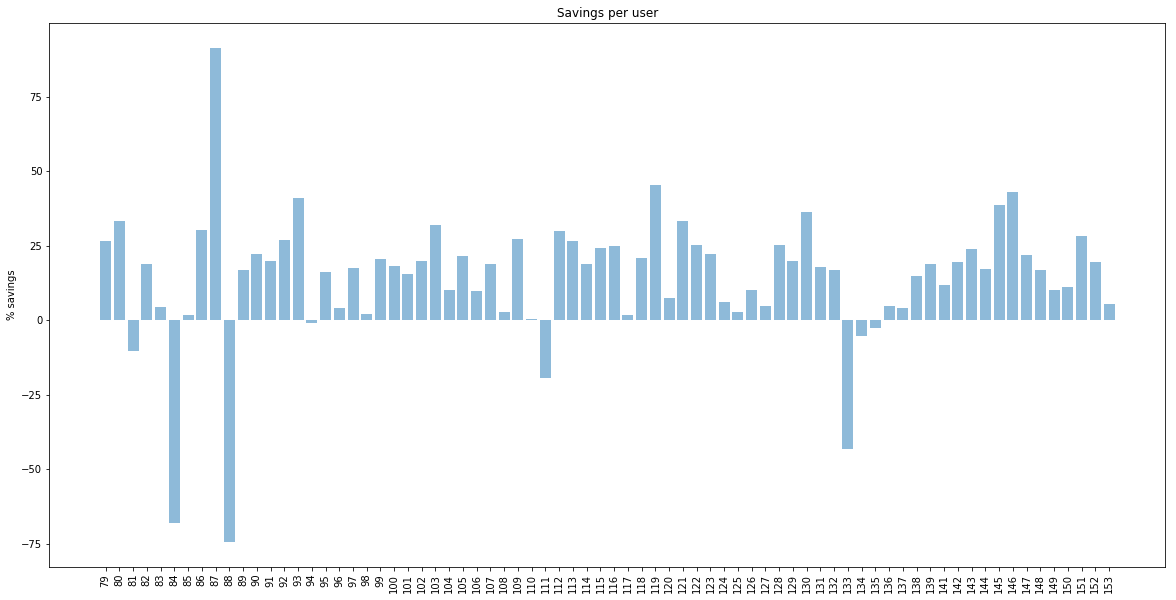

In [51]:
fig=plt.figure(figsize=(20,10))
y_pos = np.arange(len(pctg.keys()))
plt.bar(y_pos, pctg, align='center', alpha=0.5)
plt.xticks(y_pos, pctg.keys())
plt.xticks(rotation='vertical')
plt.ylabel('% savings')
plt.title('Savings per user') 
plt.show()
#fig.savefig("/Users/aer/Desktop/SES_savings_per_user.png")

## Focussed analysis on September, October, November and December

In [52]:
cons_sept_dec=monthly[5:9]
base_sept_dec=baseline_may_dec[4:]
monthly_actions_sept_dec=monthly_actions[3:7]

In [53]:
mean_cons_sept_dec=cons_sept_dec.mean(0)
mean_base_sept_dec=base_sept_dec.mean(0)


In [54]:
pctg_sept_dec=(mean_base_sept_dec-mean_cons_sept_dec)/mean_base_sept_dec*100
s=pd.Series(pctg_sept_dec)
s.mean()

18.029713363861006

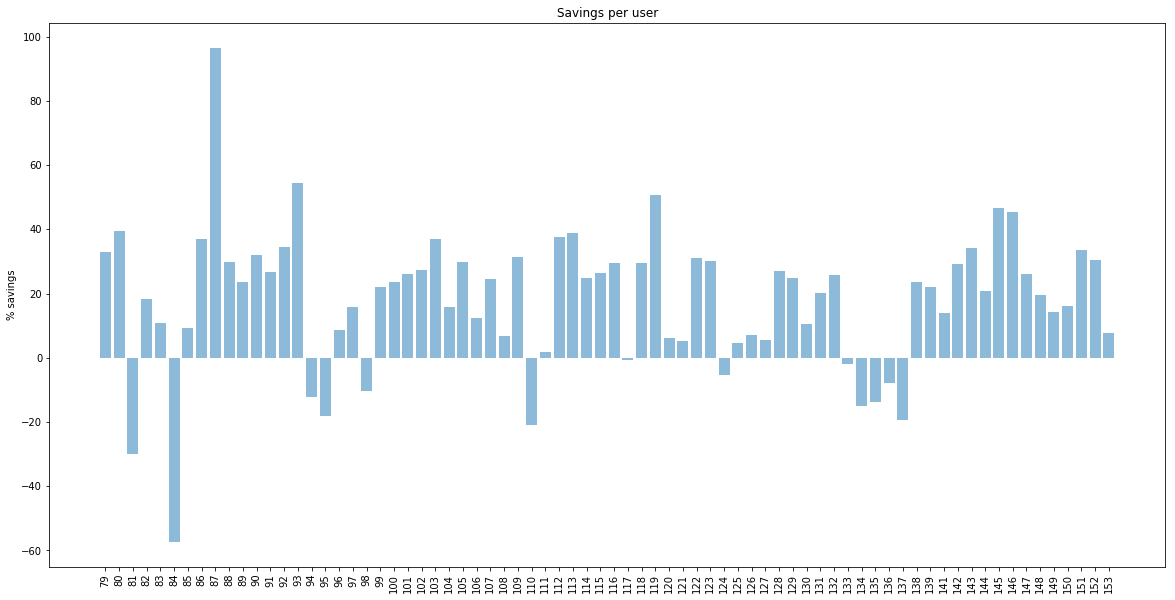

In [55]:
fig=plt.figure(figsize=(20,10))
y_pos = np.arange(len(pctg_sept_dec.keys()))
plt.bar(y_pos, pctg_sept_dec, align='center', alpha=0.5)
plt.xticks(y_pos, pctg_sept_dec.keys())
plt.xticks(rotation='vertical')
plt.ylabel('% savings')
plt.title('Savings per user') 
plt.show()

In [56]:

avg_actions=pd.Series(monthly_actions_sept_dec.mean(), index=monthly_actions_sept_dec.keys())
avg_actions.columns=['actions']
avg_actions[:10]

79    87.25
80    99.50
81     7.75
82     4.75
83     3.50
84     0.00
85    27.25
86    13.75
87     2.75
88    11.75
dtype: float64

In [57]:
avg_actions.index

Int64Index([ 79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  91,  92,
             93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
            106, 107, 109, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122,
            124, 125, 126, 127, 129, 130, 131, 132, 133, 134, 137, 138, 142,
            143, 144, 145, 146, 147, 148],
           dtype='int64')

In [58]:
action_quantiles=avg_actions.quantile([.1, .3, .5, .7])
action_quantiles.columns=['thresholds']
action_quantiles

0.1     0.500
0.3     1.800
0.5     5.250
0.7    11.975
dtype: float64

In [59]:
avg_actions.quantile(.1)

0.5

In [60]:
#utenti con attività sotto il .7 quantile
threshold=avg_actions.quantile(.7)
inactive_users =[i for i in avg_actions.index if avg_actions[i] < threshold]
active_users = [x for x in pctg.index if x not in inactive_users]

In [61]:
active_cons=pctg
active_cons=active_cons.drop(inactive_users)


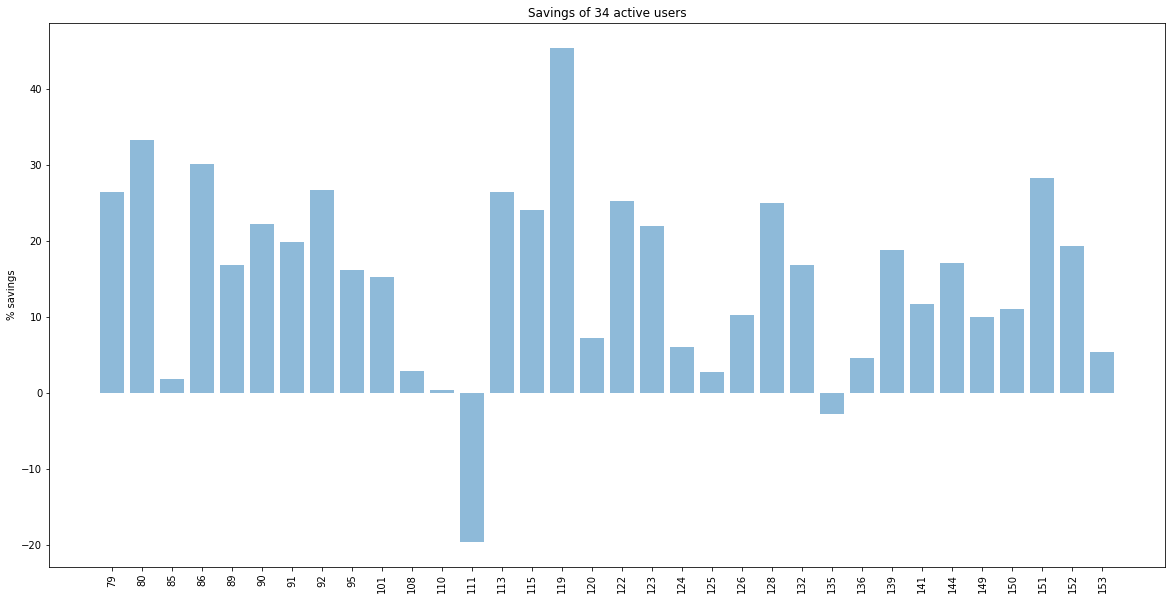

In [62]:
fig=plt.figure(figsize=(20,10))
y_pos = np.arange(len(active_cons.keys()))
plt.bar(y_pos, active_cons, align='center', alpha=0.5)
plt.xticks(y_pos, active_cons.keys())
plt.xticks(rotation='vertical')
plt.ylabel('% savings')
title = 'Savings of ' + str(len(active_cons.keys())) + ' active users'                       
plt.title(title) 
plt.show()

In [63]:
s1=pd.Series(active_cons) 
s1.mean()

15.520511143820887

In [64]:
inactive_cons=pctg
inactive_cons=inactive_cons.drop(active_users)

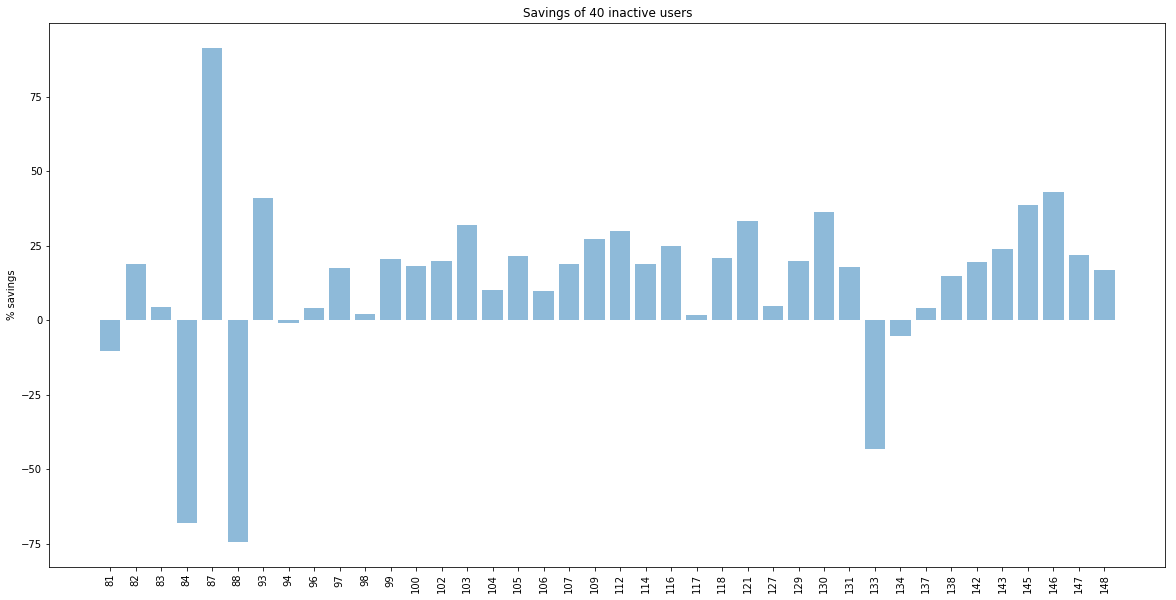

In [65]:
idx=inactive_cons.keys()
fig=plt.figure(figsize=(20,10))
y_pos = np.arange(len(idx))
plt.bar(y_pos, inactive_cons, align='center', alpha=0.5)
plt.xticks(y_pos, idx)
plt.xticks(rotation='vertical')
plt.ylabel('% savings')
title = 'Savings of ' + str(len(inactive_cons)) + ' inactive users' 
plt.title(title) 
plt.show()

In [66]:
s2=pd.Series(inactive_cons) 
s2.mean()

13.5994725328024

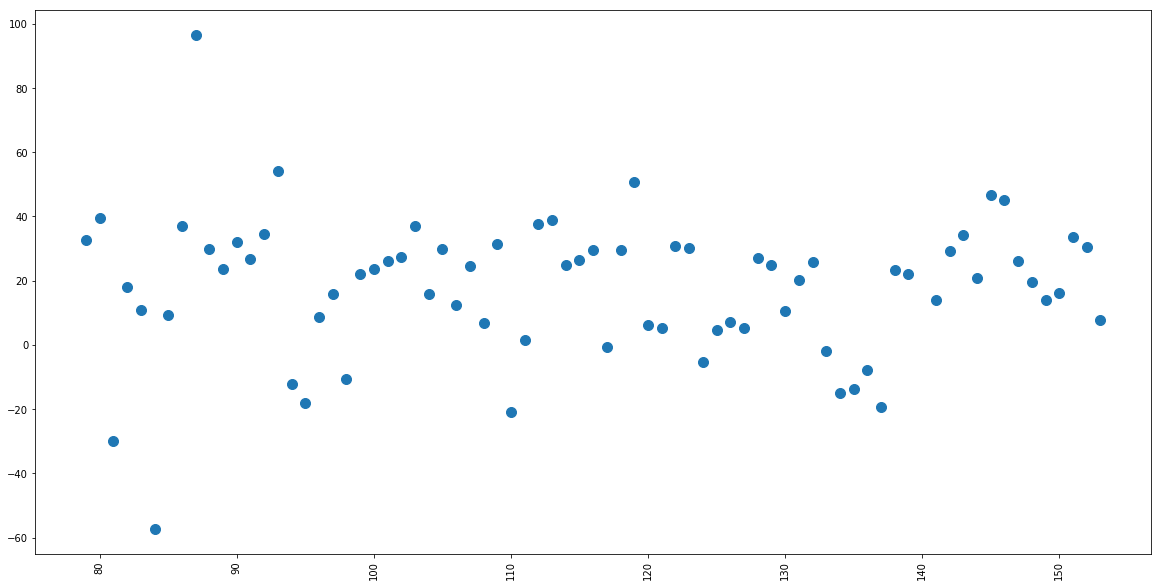

In [67]:
fig=plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
plt.scatter(pctg_sept_dec.keys(), pctg_sept_dec, s=100)
#fig.savefig("/Users/aer/Desktop/SES_savings_pre_cluster.png")

### Clustering with k-Means, consumption only feature

In [68]:
#now let's try to cluster the users according to their consumption
from sklearn.cluster import KMeans

In [69]:
cons=pctg_sept_dec.values
cons=cons.reshape(-1,1)

In [70]:
kmeans = KMeans(n_clusters=6) 
kmeans.fit(cons)
y_kmeans = kmeans.predict(cons)

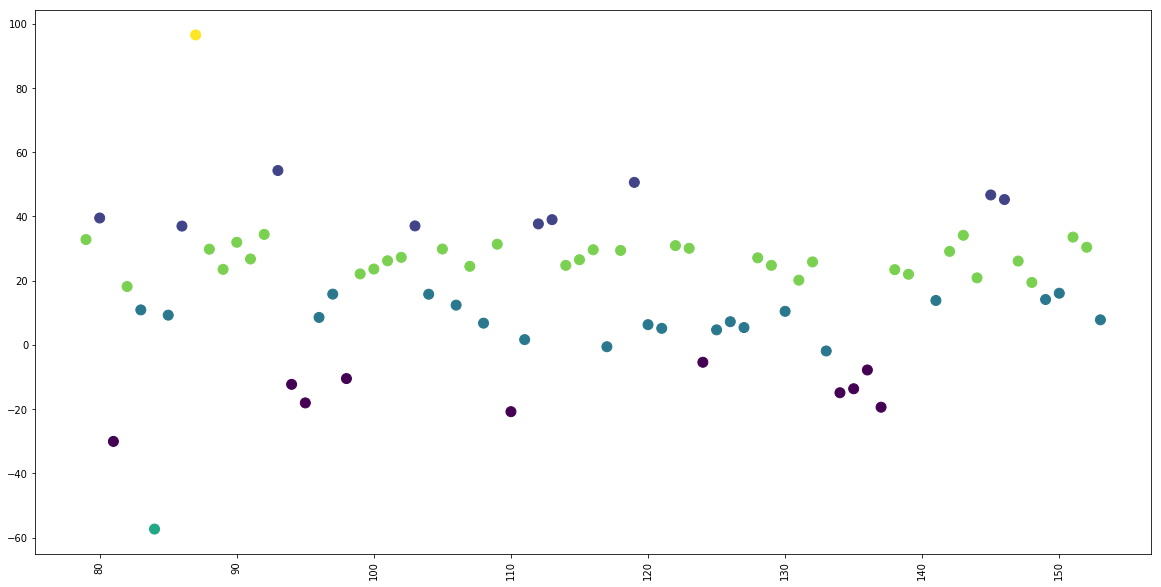

In [71]:
fig=plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
plt.scatter(pctg_sept_dec.keys(), cons, c=y_kmeans, s=100, cmap='viridis')
#fig.savefig("/Users/aer/Desktop/SES_clustered_savings.png")

In [72]:
clustering=pd.Series(y_kmeans, index=pctg_sept_dec.keys())
clustering[:10]

79    4
80    1
81    0
82    4
83    2
84    3
85    2
86    1
87    5
88    4
dtype: int32

In [73]:
clustering_outcome = pd.concat([pctg_sept_dec,clustering],axis=1 )
clustering_outcome[:10]

,0,1
79,32.819539,4
80,39.529254,1
81,-30.061197,0
82,18.186198,4
83,10.901694,2
84,-57.354582,3
85,9.271824,2
86,37.005866,1
87,96.538877,5
88,29.813830,4


In [74]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('SESanalysis.xlsx', engine='xlsxwriter')



In [75]:
clustering_outcome.columns=['consumption','cluster_id']
clustering_outcome.to_excel(writer, sheet_name='kmeans=6')

In [76]:
cluster_centers=pd.DataFrame(kmeans.cluster_centers_)
cluster_centers.columns=['cluster centres']
cluster_centers.to_excel(writer, sheet_name='cluster centres')


### Clustering with k-Means, features: consumption, activity, and profile data

In [175]:
#create an array with consumption and activity
# but first create an index which includes only users for which we have both consumption and activity data
users=[]
for i in pctg_sept_dec.keys():
    if i in avg_actions.keys():
        users.append(i)
temp=[]
for i in users:
    temp.append([pctg_sept_dec[i], #0 pos
                 avg_actions[i],   #1
                 profiles.iloc[i-79]['no_of_adults_older_than_16']+ profiles.iloc[i-79]['no_of_kids_younger_than_16'], 
                 profiles.iloc[i-79]['dwelling_type_oid'], #3
                 profiles.iloc[i-79]['heating_source_type_oid'], #4 
                 profiles.iloc[i-79]['heat_pump'], #5
                 profiles.iloc[i-79]['water_boiler'] #6
                ])

X1=np.array(temp)


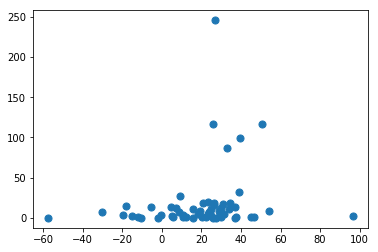

In [177]:
#consumption vs activity
plt.scatter(X1[:, 0], X1[:, 1], s=50);

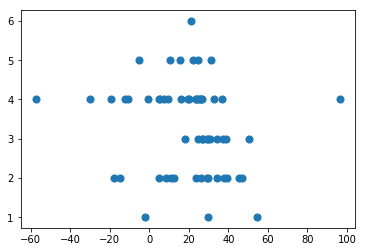

In [178]:
#consumption vs dwellers
plt.scatter(X1[:, 0], X1[:, 2], s=50);

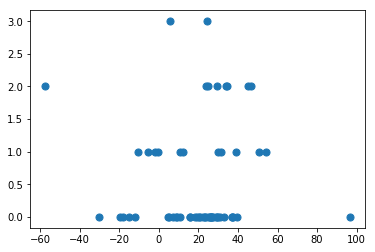

In [179]:
#consumption vs # house type
plt.scatter(X1[:, 0], X1[:, 3], s=50);

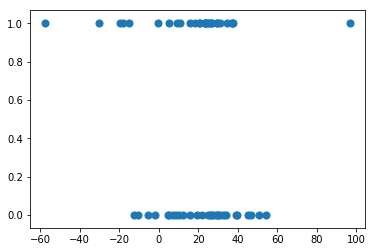

In [180]:
#consumption vs # heat pump
plt.scatter(X1[:, 0], X1[:, 6], s=50);

In [181]:
kmeans2 = KMeans(n_clusters=4) 
kmeans2.fit(X1)
y_kmeans2 = kmeans2.predict(X1)

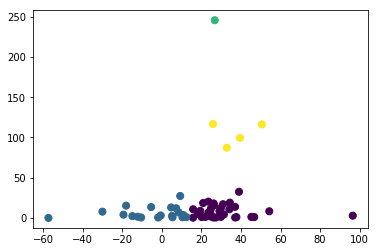

In [182]:
plt.scatter(X1[:, 0], X1[:, 1], c=y_kmeans2, s=50, cmap='viridis')
fig.savefig("/Users/aer/Desktop/SES_kmeans_2features.png")

In [141]:
### Clustering with k-Means, features: consumption, household size

### Quantiles analysis

In [142]:
pctg_df=pd.DataFrame(cons, index=pctg_sept_dec.keys())
pctg_df[:10]

,0
79,32.819539
80,39.529254
81,-30.061197
82,18.186198
83,10.901694
84,-57.354582
85,9.271824
86,37.005866
87,96.538877
88,29.813830


In [143]:
thresholds=pctg_df.quantile([.1, .3, .5, .7])
thresholds.columns=['savings']
thresholds

,savings
0.1,-11.746123
0.3,9.200634
0.5,22.779574
0.7,29.446658


In [144]:
A=pctg_df[pctg_df[0] < pctg_df[0].quantile(.1)] #increase_more_19
B=pctg_df[(pctg_df[0] > pctg_df[0].quantile(.1)) & (pctg_df[0] <= pctg_df[0].quantile(.3) )] #increase_between_19_and_2
C=pctg_df[(pctg_df[0] > pctg_df[0].quantile(.3)) & (pctg_df[0] <= pctg_df[0].quantile(.5) )] #stable_between_2_and_minus4
D=pctg_df[(pctg_df[0] > pctg_df[0].quantile(.5)) & (pctg_df[0] <= pctg_df[0].quantile(.7) )] #savers > 3 < 11%
E=pctg_df[pctg_df[0] > pctg_df[0].quantile(.7)] #supersavers >11


In [145]:
# Write each dataframe to a different worksheet.
thresholds.to_excel(writer, sheet_name='thresholds')

A.to_excel(writer, sheet_name='much worse')
B.to_excel(writer, sheet_name='rather worse')
C.to_excel(writer, sheet_name='stable')
D.to_excel(writer, sheet_name='rather better')
E.to_excel(writer, sheet_name='much better')


In [157]:
E

,0
79,32.819539
80,39.529254
86,37.005866
87,96.538877
88,29.813830
90,31.963834
92,34.412610
93,54.314494
103,37.061762
105,29.861998


In [159]:
# find how many users have an heat pump among those who saved a lot
for elem in E.index:
    if profiles.values[elem-79][8] == 1:
        print("yay")

yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay


### Classification based on thresholds


1. users who increased consumption: worse
2. rather stable consumption, no change: -3 to 2% —> for this one we prepared an additional letter : stable
3. savings until 10%: mild_savers
4. savings 10-20%:  savers 
5. supersavers over 20%: supersavers

In [298]:
worse=[]
worseidx=[]

stable=[]
stableidx=[]

mild_savers=[]
mild_saversidx=[]

savers=[]
saversidx=[]

supersavers=[]
supersaversidx=[]

In [299]:
for elem in pctg_sept_dec.keys():
    if pctg_sept_dec[elem] <-3:
        worse.append(pctg_sept_dec[elem] )
        worseidx.append(elem)
    elif (pctg_sept_dec[elem] >=-3) and (pctg_sept_dec[elem] <2):
        stable.append(pctg_sept_dec[elem] )
        stableidx.append(elem)
    elif (pctg_sept_dec[elem] >=2) and (pctg_sept_dec[elem] <10):
        mild_savers.append(pctg_sept_dec[elem] )
        mild_saversidx.append(elem)
    elif (pctg_sept_dec[elem] >=10) and (pctg_sept_dec[elem] <20):
        savers.append(pctg_sept_dec[elem] )
        saversidx.append(elem)
    elif (pctg_sept_dec[elem] >=20):
        supersavers.append(pctg_sept_dec[elem] )
        supersaversidx.append(elem)

In [300]:
worse_s=pd.Series(worse)
worse_s.index=worseidx

stable_s=pd.Series(stable)
stable_s.index=stableidx

mild_savers_s=pd.Series(mild_savers)
mild_savers_s.index=mild_saversidx

savers_s=pd.Series(savers)
savers_s.index=saversidx

supersavers_s=pd.Series(supersavers)
supersavers_s.index=supersaversidx

In [301]:
worse_s.to_excel(writer, sheet_name='worse <-3')
stable_s.to_excel(writer, sheet_name='-3 <=stable < 2')
mild_savers_s.to_excel(writer, sheet_name='2 <=mild_savers < 10')
savers_s.to_excel(writer, sheet_name='10 <=savers < 20')
supersavers_s.to_excel(writer, sheet_name='supersavers >= 10')

In [302]:

writer.save()

## Analysis of individual users

In [303]:
baseline_may_dec

,79,80,81,82,83,84,85,86,87,88,...,144,145,146,147,148,149,150,151,152,153
month,,,,,,,,,,,,,,,,,,,,,
2017-06-30,227.124,544.328,422.738,358.857,169.949,34.194,348.973,252.570,824.793,225.440,...,400.207,220.998,339.299,561.062,817.808,81.661,207.449,370.442,286.399,201.199
2017-07-31,309.771,568.914,349.797,351.834,140.354,39.294,336.459,218.424,737.765,207.070,...,465.830,127.049,444.548,561.025,821.774,86.452,264.429,333.084,251.829,193.320
2017-08-31,346.875,535.292,401.216,362.265,176.047,36.225,373.168,230.551,741.102,207.970,...,458.046,96.826,446.410,609.375,876.898,85.032,292.814,353.005,320.578,197.725
2017-09-30,472.308,559.926,436.974,305.943,115.063,34.791,535.535,263.015,876.658,215.730,...,467.570,146.604,374.930,612.541,859.124,100.767,384.085,364.767,578.664,187.173
2017-10-31,369.948,687.506,437.011,372.790,143.061,44.000,534.715,594.475,1034.839,265.153,...,526.376,170.049,437.815,517.465,1291.350,106.313,389.590,455.315,1599.539,238.613
2017-11-30,509.492,1258.417,451.139,693.225,149.065,43.468,586.299,1154.950,1629.407,328.036,...,940.037,197.961,479.417,484.164,2964.415,146.144,540.021,748.935,788.851,246.461
2017-12-31,931.182,2206.278,532.253,1043.034,159.672,46.175,982.887,1448.760,2567.758,540.445,...,1887.031,148.208,561.549,1444.193,3412.849,238.220,554.852,1197.287,1668.610,296.702
2018-01-31,1129.855,1926.540,471.847,882.258,176.719,49.141,899.068,1220.582,2208.962,494.020,...,1353.353,194.002,542.426,1046.596,3292.295,204.086,552.744,890.277,1262.944,266.648


In [304]:
shifted_baseline=baseline_may_dec
shifted_baseline.index=monthly_may_dec.index


In [310]:
savings = (shifted_baseline-monthly_may_dec)/shifted_baseline*100

In [311]:
shifted_baseline.isnull().sum().sum()

0

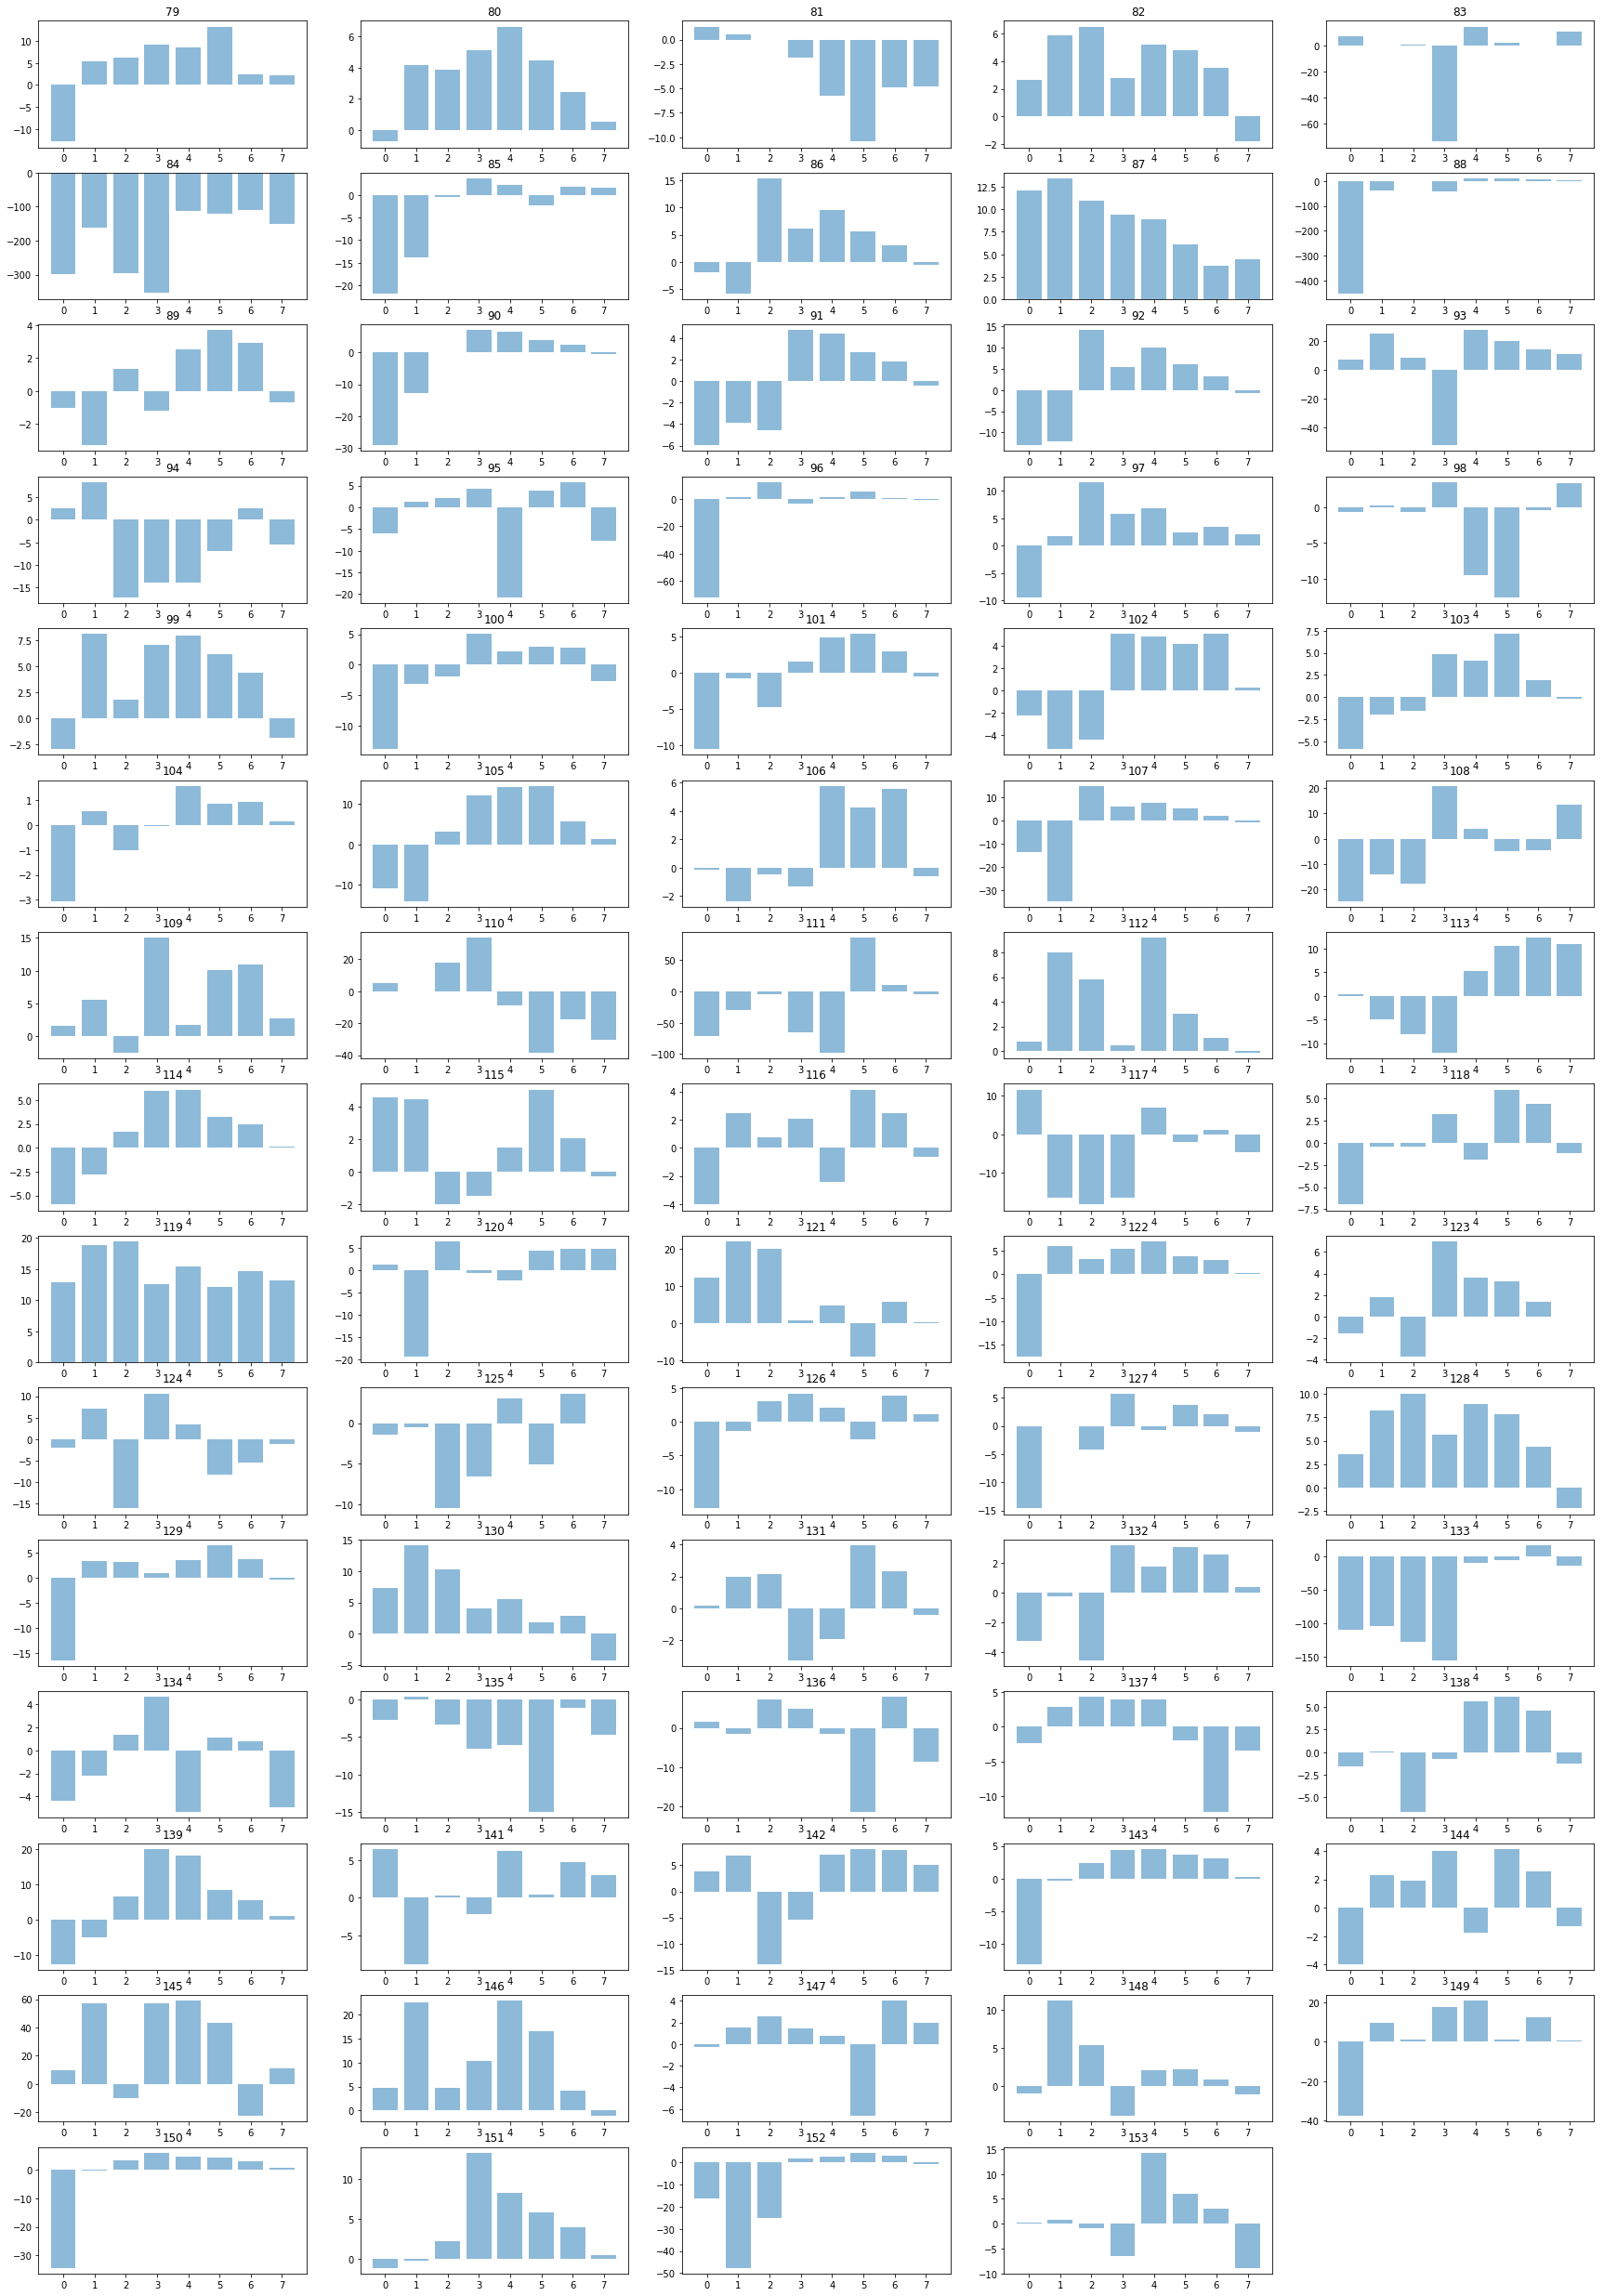

In [312]:
max=len(savings.keys())
fig=plt.figure(figsize=(30,3*max))
i=1
y_pos=np.arange(8) #number of months to display
for user in savings.keys()[:max]:
    plt.subplot(max, 5, i) 
    #plt.plot(savings[user])
    plt.title(user)
    plt.bar(y_pos, (savings[user]/shifted_baseline[user])*100, align='center', alpha=0.5)
    i=i+1
    